<a href="https://colab.research.google.com/github/Valeron31/ALX_Udacity/blob/main/Project_Investigating_a_DataSet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project: To determine the relationship between the FBI gun data from NICS and US Census data
### Name of Student: Okwara Onyekachi Nelson

# Table of Contents

*   Introduction
*   Data Wrangling
*   Exploratory Data Analysis
*   Conclusion


# Introduction

This project makes use of two data sets: FBI gun data from National Instant Criminal Backgroud Check System and population data from U.S Census data. While the gun data is upto date until september 2017, the census data is valid till July 2016.
We wish to derive valuable insights from these data by applying the data analysis steps. By so doing, we shall answer some critical questions such as:


*   what the overall trend of gun purchases looks like?
*   What census data that is associated with high gun per capita?
*   which states have had the highest growth in gun registration?
 

 


**Disclaimer**: It is important to note that the statistics within this project represent the number of firearm background checks initiated through the NICS. They do not represent the number of firearms sold. Based on varying state laws and purchase scenarios, a one-to-one correlation cannot be made between a firearm background check and a firearm sale.

In [ ]:
# upload files into google colab using the following snippet

# from google.colab import files
# uploaded = files.upload()

In [ ]:
# import the required libraries to use for the analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_columns', 65) #see upto 65 column labels
pd.set_option('display.max_rows', 65) #see upto 65 row labels

df_gun = pd.read_excel('gun_data.xlsx') #read in the gun data and assign to dataframe

df_census = pd.read_csv('U.S. Census Data.csv') #read in the census data and assign it to a dataframe




In [ ]:
# define a function to always inspect the first five rows of the data

def inspect_data(x):
    output = x.head()
    return output

# Data Wrangling
### Examine the gun data 
We need to carry out some inspection on the two data sets before we can proceed.
In the next code cells, we shall write some codes to derive insights from the FBI gun data


In [ ]:
# use the define function to inspect the data

# df_gun.head() #examine the first five rows of the gun data 

inspect_data(df_gun)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,redemption_handgun,redemption_long_gun,redemption_other,returned_handgun,returned_long_gun,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,21.0,2.0,1378.0,1262.0,1.0,0.0,0.0,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,2.0,0.0,200.0,154.0,2.0,28.0,30.0,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,6.0,0.0,1474.0,748.0,3.0,82.0,5.0,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,13.0,0.0,1296.0,1824.0,4.0,0.0,0.0,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,0.0,0.0,535.0,397.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


the code below shows the number of rows and columns in the data set. we could see that we have a total of 12485 rows and 27 columns

In [ ]:
df_gun.shape #check the number of rows and columns in the data

# the result shows that we have 12485 rows and 27 columns

(12485, 27)

the code below gives the number of non null values in each column as well as the datatypes of each column

In [ ]:
df_gun.info() #check the number of non null values in the columns as well as the data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   permit                     12461 non-null  float64
 3   permit_recheck             1100 non-null   float64
 4   handgun                    12465 non-null  float64
 5   long_gun                   12466 non-null  float64
 6   other                      5500 non-null   float64
 7   multiple                   12485 non-null  int64  
 8   admin                      12462 non-null  float64
 9   prepawn_handgun            10542 non-null  float64
 10  prepawn_long_gun           10540 non-null  float64
 11  prepawn_other              5115 non-null   float64
 12  redemption_handgun         10545 non-null  float64
 13  redemption_long_gun        10544 non-null  flo

,mean,std
state,,
California,83762.392070,42721.777295
Florida,51523.246696,32172.950148
Ohio,37280.810573,18665.830257
Pennsylvania,57858.484581,22522.982415
Texas,85617.559471,38059.771978


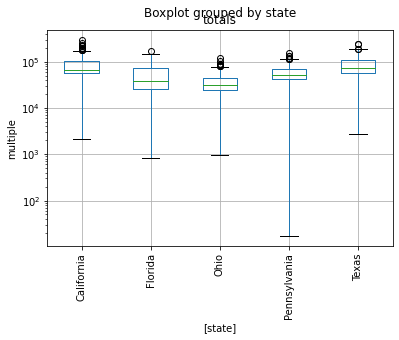

In [ ]:
df_1 = df_gun.groupby('state')[['long_gun']].sum().sort_values(by=['long_gun'], ascending=False)[0:5]
df_new = df_gun[df_gun['state'].isin(df_1.index.values.tolist())]

# remove budget = 0
df_new1 = df_new[df_new['totals']>0]
df_new1.boxplot(column=['totals'], by=['state'], rot =90).set_yscale('log')
plt.ylabel('multiple')
pd.DataFrame(df_new1.groupby(['state'])['totals'].describe().loc[:,['mean','std']])

,totals
state,
California,83762.392070
Florida,51523.246696
Ohio,37280.810573
Pennsylvania,57858.484581
Texas,85617.559471


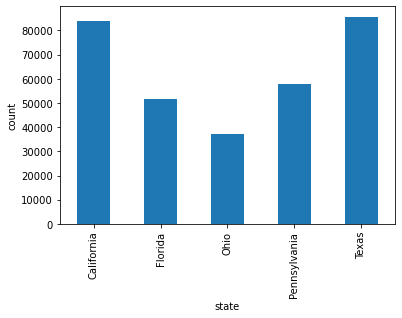

In [ ]:
df_new1.groupby(['state'])['totals'].mean().plot(kind='bar').set_ylabel('count')
df_new1.groupby(['state'])[['totals']].mean()

we observed that all the numerical columns from permit to return_to_seller_other all add up to give the total column. this shows that the only column we should be working with is the total column. hence, we shall drop the other columns

In [ ]:
# drop all the columns except the month, state and totals columns
columns_to_drop = df_gun.columns.to_list()[2:-1]
df_gun.drop(columns = columns_to_drop, inplace=True)

We create a new column, date, from the month column and convert it to a datetime object

In [ ]:
# create a date column from the month's column 

df_gun['date'] = pd.to_datetime(df_gun['month'])
inspect_data(df_gun)

,month,state,totals,date
0,2017-09,Alabama,32019,2017-09-01
1,2017-09,Alaska,6303,2017-09-01
2,2017-09,Arizona,28394,2017-09-01
3,2017-09,Arkansas,17747,2017-09-01
4,2017-09,California,123506,2017-09-01


In [ ]:
# check to see if the date data type is the datetime object
df_gun.dtypes

month             object
state             object
totals             int64
date      datetime64[ns]
dtype: object

We extract the month and year from the datetime object. this would come in handy in the exploratory stage of the project when we want to show the trends.

In [ ]:
# extract the month and year from the date column

df_gun['month'] = df_gun['date'].dt.month #extract the month from the date column and assign it to a new column, month.

df_gun['year'] = df_gun['date'].dt.year #extract the year from the date column and assign it to a new column, year.

inspect_data(df_gun)

,month,state,totals,date,year
0,9,Alabama,32019,2017-09-01,2017
1,9,Alaska,6303,2017-09-01,2017
2,9,Arizona,28394,2017-09-01,2017
3,9,Arkansas,17747,2017-09-01,2017
4,9,California,123506,2017-09-01,2017


we would prefer the month be in strings of letters that is easily readable. hence, we use the pandas map function as shown below 

In [ ]:
# change the month entry using the pandas map function
df_gun['month'] =  df_gun['month'].map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr',5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})
df_gun.dtypes

month             object
state             object
totals             int64
date      datetime64[ns]
year               int64
dtype: object

In [ ]:
inspect_data(df_gun) # examine the first five rows of the data

,month,state,totals,date,year
0,Sep,Alabama,32019,2017-09-01,2017
1,Sep,Alaska,6303,2017-09-01,2017
2,Sep,Arizona,28394,2017-09-01,2017
3,Sep,Arkansas,17747,2017-09-01,2017
4,Sep,California,123506,2017-09-01,2017


We arbitrarily change the column name from totals to background_checks for easy reference

In [ ]:
# rename the totals column to background_checks

df_gun.rename(columns = {'totals': 'background_checks'}, inplace = True)
inspect_data(df_gun)

,month,state,background_checks,date,year
0,Sep,Alabama,32019,2017-09-01,2017
1,Sep,Alaska,6303,2017-09-01,2017
2,Sep,Arizona,28394,2017-09-01,2017
3,Sep,Arkansas,17747,2017-09-01,2017
4,Sep,California,123506,2017-09-01,2017


we use the groupby function to sum the background checks by states

In [ ]:
df_gun.groupby('state')['background_checks'].sum()

state
Alabama                  6706079
Alaska                   1137643
Arizona                  4425714
Arkansas                 3752633
California              19014063
Colorado                 6058482
Connecticut              3168126
Delaware                  491369
District of Columbia        5601
Florida                 11695777
Georgia                  7209942
Guam                       14997
Hawaii                    197580
Idaho                    1968134
Illinois                15471534
Indiana                  7737172
Iowa                     2297156
Kansas                   2624669
Kentucky                29762434
Louisiana                4705057
Maine                    1257457
Mariana Islands              462
Maryland                 2035652
Massachusetts            2571321
Michigan                 7254279
Minnesota                6279271
Mississippi              3576312
Missouri                 6549018
Montana                  1884124
Nebraska                 1136209
Neva

### Examine the census data

we need to inspect and clean up the census data

In [ ]:
# examine the first five rows of the data
inspect_data(df_census)

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065","20,612,439","10,310,371","1,428,557","1,683,140","12,801,539","6,633,053","3,134,693","2,907,289","4,436,974","4,681,666","1,331,479","6,016,447","6,811,779","9,928,300","5,519,952","2,988,726","6,093,000","1,042,520","1,907,116","2,940,058","1,334,795","8,944,469",2081015,19745289,10146788,757952,11614373,3923561,4093465,12784227,1056426,4961119,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936","18,804,592","9,688,680","1,360,301","1,567,650","12,831,574","6,484,136","3,046,869","2,853,129","4,339,344","4,533,479","1,328,364","5,773,786","6,547,813","9,884,129","5,303,924","2,968,103","5,988,928","989,414","1,826,334","2,700,691","1,316,461","8,791,953",2059198,19378110,9535688,672591,11536727,3751615,3831072,12702857,1052940,4625410,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,9.60%,6.40%,5.00%,7.40%,-0.20%,2.30%,2.90%,1.90%,2.20%,3.30%,0.20%,4.20%,4.00%,0.40%,4.10%,0.70%,1.70%,5.40%,4.40%,8.90%,1.40%,1.70%,0.011,0.019,0.064,0.127,0.007,0.046,0.068,0.006,0.003,0.073,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934","18,801,310","9,687,653","1,360,301","1,567,582","12,830,632","6,483,802","3,046,355","2,853,118","4,339,367","4,533,372","1,328,361","5,773,552","6,547,629","9,883,640","5,303,925","2,967,297","5,988,927","989,415","1,826,341","2,700,551","1,316,470","8,791,894",2059179,19378102,9535483,672591,11536504,3751351,3831074,12702379,1052567,4625364,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,5.50%,6.40%,6.40%,6.80%,6.00%,6.40%,6.40%,6.70%,6.20%,6.60%,4.90%,6.10%,5.30%,5.80%,6.40%,6.30%,6.10%,6.00%,7.00%,6.30%,4.80%,5.80%,0.062,0.059,0.06,0.073,0.06,0.068,0.058,0.056,0.052,0.059,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


By studying the data, we found that the column, Fact Note, will not be useful. Hencd, we will drop this column

In [ ]:
df_census.drop(columns=['Fact Note'], inplace = True) # drop the column Fact Note


by inspection, row indexes from 65 to 84 seems not useful also. we shall also drop these rows

In [ ]:
df_census.index[65:84]

RangeIndex(start=65, stop=84, step=1)

In [ ]:
# By carefyul examination, index number 65 to 84 are not required. therefore we need to drop them
df_census.drop(index = df_census.index[65:85], axis = 0, inplace = True)



we inspect the whole of the data entry in order to look for special characters. we will need to remove the characters from this entries

In [ ]:
# check for the special characters in the data frame entries

xters = df_census[df_census['Alabama'].str.contains(',','%','$', regex = False)]
xters

,Fact,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)","4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065","20,612,439","10,310,371","1,428,557","1,683,140","12,801,539","6,633,053","3,134,693","2,907,289","4,436,974","4,681,666","1,331,479","6,016,447","6,811,779","9,928,300","5,519,952","2,988,726","6,093,000","1,042,520","1,907,116","2,940,058","1,334,795","8,944,469",2081015,19745289,10146788,757952,11614373,3923561,4093465,12784227,1056426,4961119,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...","4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936","18,804,592","9,688,680","1,360,301","1,567,650","12,831,574","6,484,136","3,046,869","2,853,129","4,339,344","4,533,479","1,328,364","5,773,786","6,547,813","9,884,129","5,303,924","2,968,103","5,988,928","989,414","1,826,334","2,700,691","1,316,461","8,791,953",2059198,19378110,9535688,672591,11536727,3751615,3831072,12702857,1052940,4625410,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
3,"Population, Census, April 1, 2010","4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934","18,801,310","9,687,653","1,360,301","1,567,582","12,830,632","6,483,802","3,046,355","2,853,118","4,339,367","4,533,372","1,328,361","5,773,552","6,547,629","9,883,640","5,303,925","2,967,297","5,988,927","989,415","1,826,341","2,700,551","1,316,470","8,791,894",2059179,19378102,9535483,672591,11536504,3751351,3831074,12702379,1052567,4625364,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
20,"Veterans, 2011-2015","363,170","69,323","505,794","220,953","1,777,410","391,725","199,331","71,213","1,507,738","670,617","110,238","119,711","668,933","426,493","211,066","198,396","297,312","281,989","119,058","403,900","355,083","626,722","342,388","184,774","451,342","90,000","132,918","220,332","106,827","393,277",164157,828586,696119,51179,806531,295847,306723,870770,66076,378959,63742,462414,"1,539,655","134,332","44,708","706,539","564,864","150,021","381,940","48,505"
22,"Housing units, July 1, 2016, (V2016)","2,230,185","310,658","2,961,003","1,354,762","14,060,525","2,339,118","1,499,116","426,149","9,301,642","4,218,776","537,114","700,825","5,326,970","2,854,546","1,380,162","1,259,864","1,965,556","2,036,975","730,705","2,447,127","2,858,026","4,560,055","2,409,935","1,307,441","2,760,084","497,756","827,156","1,221,698","625,307","3,604,409",917568,8231687,4540498,368624,5164361,1721045,1732786,5612002,462589,2236153,383838,2919671,"10,753,629","1,054,164","329,525","3,491,054","3,025,685","886,640","2,668,444","270,600"
23,"Housing units, April 1, 2010","2,171,853","306,967","2,844,526","1,316,299","13,680,081","2,212,898","1,487,891","405,885","8,989,580","4,088,801","519,508","667,796","5,296,715","2,795,541","1,336,417","1,233,215","1,927,164","1,964,981","721,830","2,378,814","2,808,254","4,532,233","2,347,201","1,274,719","2,712,729","482,825","796,793","1,173,814","614,754","3,553,562",901388,8108103,4327528,317498,5127508,1664378,1675562,5567315,463388,2137683,363438,2812133,"9,977,436","979,709","322,539","3,364,939","2,885,677","881,917","2,624,358","261,868"
25,"Median value of owner-occupied housing units, ...","$125,500","$250,000","$167,500","$111,400","$385,500","$247,800","

we identify the columns that have these special characters that needed to be removed

In [ ]:
# list the columns having the entries with special characters to be removed
column_remove_signs = df_census.columns.to_list()
column_remove_signs

['Fact',
 'Alabama',
 'Alaska',
 'Arizona',
 'Arkansas',
 'California',
 'Colorado',
 'Connecticut',
 'Delaware',
 'Florida',
 'Georgia',
 'Hawaii',
 'Idaho',
 'Illinois',
 'Indiana',
 'Iowa',
 'Kansas',
 'Kentucky',
 'Louisiana',
 'Maine',
 'Maryland',
 'Massachusetts',
 'Michigan',
 'Minnesota',
 'Mississippi',
 'Missouri',
 'Montana',
 'Nebraska',
 'Nevada',
 'New Hampshire',
 'New Jersey',
 'New Mexico',
 'New York',
 'North Carolina',
 'North Dakota',
 'Ohio',
 'Oklahoma',
 'Oregon',
 'Pennsylvania',
 'Rhode Island',
 'South Carolina',
 'South Dakota',
 'Tennessee',
 'Texas',
 'Utah',
 'Vermont',
 'Virginia',
 'Washington',
 'West Virginia',
 'Wisconsin',
 'Wyoming']

we utilize the for loop to iterate the dataframe and apply the lambda function on each of the entries to remove any special characters

In [ ]:
# remove white spaces and special xters

for c in column_remove_signs:
  df_census[c] = df_census[c].apply(lambda x: x.strip().replace(',','').replace('$','').replace('%',''))

In [ ]:
inspect_data(df_census)

,Fact,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,Population estimates July 1 2016 (V2016),4863300,741894,6931071,2988248,39250017,5540545,3576452,952065,20612439,10310371,1428557,1683140,12801539,6633053,3134693,2907289,4436974,4681666,1331479,6016447,6811779,9928300,5519952,2988726,6093000,1042520,1907116,2940058,1334795,8944469,2081015,19745289,10146788,757952,11614373,3923561,4093465,12784227,1056426,4961119,865454,6651194,27862596,3051217,624594,8411808,7288000,1831102,5778708,585501
1,Population estimates base April 1 2010 (V2016),4780131,710249,6392301,2916025,37254522,5029324,3574114,897936,18804592,9688680,1360301,1567650,12831574,6484136,3046869,2853129,4339344,4533479,1328364,5773786,6547813,9884129,5303924,2968103,5988928,989414,1826334,2700691,1316461,8791953,2059198,19378110,9535688,672591,11536727,3751615,3831072,12702857,1052940,4625410,814195,6346298,25146100,2763888,625741,8001041,6724545,1853011,5687289,563767
2,Population percent change - April 1 2010 (esti...,1.70,4.50,8.40,2.50,5.40,10.20,0.10,6.00,9.60,6.40,5.00,7.40,-0.20,2.30,2.90,1.90,2.20,3.30,0.20,4.20,4.00,0.40,4.10,0.70,1.70,5.40,4.40,8.90,1.40,1.70,0.011,0.019,0.064,0.127,0.007,0.046,0.068,0.006,0.003,0.073,0.063,0.048,10.80,10.40,-0.20,5.10,8.40,-1.20,1.60,3.90
3,Population Census April 1 2010,4779736,710231,6392017,2915918,37253956,5029196,3574097,897934,18801310,9687653,1360301,1567582,12830632,6483802,3046355,2853118,4339367,4533372,1328361,5773552,6547629,9883640,5303925,2967297,5988927,989415,1826341,2700551,1316470,8791894,2059179,19378102,9535483,672591,11536504,3751351,3831074,12702379,1052567,4625364,814180,6346105,25145561,2763885,625741,8001024,6724540,1852994,5686986,563626
4,Persons under 5 years percent July 1 2016 (V2...,6.00,7.30,6.30,6.40,6.30,6.10,5.20,5.80,5.50,6.40,6.40,6.80,6.00,6.40,6.40,6.70,6.20,6.60,4.90,6.10,5.30,5.80,6.40,6.30,6.10,6.00,7.00,6.30,4.80,5.80,0.062,0.059,0.06,0.073,0.06,0.068,0.058,0.056,0.052,0.059,0.071,0.061,7.20,8.30,4.90,6.10,6.20,5.50,5.80,6.50


we set the Fact column as the index

In [ ]:
# set the Fact column as the index

df_census.set_index('Fact', inplace = True)

we swap the new index with the other columns. reason is that, having studied the data carefully. we determined that it is best to use the states as the row.

In [ ]:
# swap the index and the columns to create a new census dataframe

new_df_census = df_census.swapaxes('index', 'columns' )
inspect_data(new_df_census)

Fact,Population estimates July 1 2016 (V2016),Population estimates base April 1 2010 (V2016),Population percent change - April 1 2010 (estimates base) to July 1 2016 (V2016),Population Census April 1 2010,Persons under 5 years percent July 1 2016 (V2016),Persons under 5 years percent April 1 2010,Persons under 18 years percent July 1 2016 (V2016),Persons under 18 years percent April 1 2010,Persons 65 years and over percent July 1 2016 (V2016),Persons 65 years and over percent April 1 2010,Female persons percent July 1 2016 (V2016),Female persons percent April 1 2010,White alone percent July 1 2016 (V2016),Black or African American alone percent July 1 2016 (V2016),American Indian and Alaska Native alone percent July 1 2016 (V2016),Asian alone percent July 1 2016 (V2016),Native Hawaiian and Other Pacific Islander alone percent July 1 2016 (V2016),Two or More Races percent July 1 2016 (V2016),Hispanic or Latino percent July 1 2016 (V2016),White alone not Hispanic or Latino percent July 1 2016 (V2016),Veterans 2011-2015,Foreign born persons percent 2011-2015,Housing units July 1 2016 (V2016),Housing units April 1 2010,Owner-occupied housing unit rate 2011-2015,Median value of owner-occupied housing units 2011-2015,Median selected monthly owner costs -with a mortgage 2011-2015,Median selected monthly owner costs -without a mortgage 2011-2015,Median gross rent 2011-2015,Building permits 2016,Households 2011-2015,Persons per household 2011-2015,Living in same house 1 year ago percent of persons age 1 year+ 2011-2015,Language other than English spoken at home percent of persons age 5 years+ 2011-2015,High school graduate or higher percent of persons age 25 years+ 2011-2015,Bachelor's degree or higher percent of persons age 25 years+ 2011-2015,With a disability under age 65 years percent 2011-2015,Persons without health insurance under age 65 years percent,In civilian labor force total percent of population age 16 years+ 2011-2015,In civilian labor force female percent of population age 16 years+ 2011-2015,Total accommodation and food services sales 2012 (1000),Total health care and social assistance receipts/revenue 2012 (1000),Total manufacturers shipments 2012 (1000),Total merchant wholesaler sales 2012 (1000),Total retail sales 2012 (1000),Total retail sales per capita 2012,Mean travel time to work (minutes) workers age 16 years+ 2011-2015,Median household income (in 2015 dollars) 2011-2015,Per capita income in past 12 months (in 2015 dollars) 2011-2015,Persons in poverty percent,Total employer establishments 2015,Total employment 2015,Total annual payroll 2015 (1000),Total employment percent change 2014-2015,Total nonemployer establishments 2015,All firms 2012,Men-owned firms 2012,Women-owned firms 2012,Minority-owned firms 2012,Nonminority-owned firms 2012,Veteran-owned firms 2012,Nonveteran-owned firms 2012,Population per square mile 2010,Land area in square miles 2010,FIPS Code
Alabama,4863300,4780131,1.70,4779736,6.00,6.40,22.60,23.70,16.10,13.80,51.60,51.50,69.30,26.80,0.70,1.40,0.10,1.60,4.20,65.80,363170,3.50,2230185,2171853,68.70,125500,1139,345,717,15001,1848325,2.55,85.30,5.20,84.30,23.50,11.80,10.70,58.00,53.00,7576462,26039632,124809759,57746565,58564965,12145,24.4,43623,24091,17.10,98540,1634391,67370353,1.90,322025,374153,203604,137630,92219,272651,41943,316984,94.4,50645.33,"""01"""
Alaska,741894,710249,4.50,710231,7.30,7.60,25.20,26.40,10.40,7.70,47.70,48.00,66.10,3.80,15.20,6.30,1.30,7.30,7.00,61.20,69323,7.40,310658,306967,63.40,250000,1827,554,1146,1503,250969,2.81,80.90,16.20,92.10,28.00,8.10,15.50,67.70,65.00,2221335,6375483,D,5216303,10474275,14320,19,72515,33413,9.90,20907,267999,15643303,0.40,55521,68032,35402,22141,13688,51147,7953,56091,1.2,570640.95,"""02"""
Arizona,6931071,6392301,8.40,6392017,6.30,7.10,23.50,25.50,16.90,13.80,50.30,50.30,83.30,4.90,5.40,3.40,0.30,2.80,30.90,55.50,505794,13.50,2961003,2844526,62.80,167500,1343,380,913,35578,2412212,2.69,81.30,26.90,86.00,27.50,8.20,11.90,59.30,54.50,13

we reset the index

In [ ]:
# reset the index of the new dataframe
new_df_census.reset_index(inplace=True)
inspect_data(new_df_census)

Fact,index,Population estimates July 1 2016 (V2016),Population estimates base April 1 2010 (V2016),Population percent change - April 1 2010 (estimates base) to July 1 2016 (V2016),Population Census April 1 2010,Persons under 5 years percent July 1 2016 (V2016),Persons under 5 years percent April 1 2010,Persons under 18 years percent July 1 2016 (V2016),Persons under 18 years percent April 1 2010,Persons 65 years and over percent July 1 2016 (V2016),Persons 65 years and over percent April 1 2010,Female persons percent July 1 2016 (V2016),Female persons percent April 1 2010,White alone percent July 1 2016 (V2016),Black or African American alone percent July 1 2016 (V2016),American Indian and Alaska Native alone percent July 1 2016 (V2016),Asian alone percent July 1 2016 (V2016),Native Hawaiian and Other Pacific Islander alone percent July 1 2016 (V2016),Two or More Races percent July 1 2016 (V2016),Hispanic or Latino percent July 1 2016 (V2016),White alone not Hispanic or Latino percent July 1 2016 (V2016),Veterans 2011-2015,Foreign born persons percent 2011-2015,Housing units July 1 2016 (V2016),Housing units April 1 2010,Owner-occupied housing unit rate 2011-2015,Median value of owner-occupied housing units 2011-2015,Median selected monthly owner costs -with a mortgage 2011-2015,Median selected monthly owner costs -without a mortgage 2011-2015,Median gross rent 2011-2015,Building permits 2016,Households 2011-2015,...,Language other than English spoken at home percent of persons age 5 years+ 2011-2015,High school graduate or higher percent of persons age 25 years+ 2011-2015,Bachelor's degree or higher percent of persons age 25 years+ 2011-2015,With a disability under age 65 years percent 2011-2015,Persons without health insurance under age 65 years percent,In civilian labor force total percent of population age 16 years+ 2011-2015,In civilian labor force female percent of population age 16 years+ 2011-2015,Total accommodation and food services sales 2012 (1000),Total health care and social assistance receipts/revenue 2012 (1000),Total manufacturers shipments 2012 (1000),Total merchant wholesaler sales 2012 (1000),Total retail sales 2012 (1000),Total retail sales per capita 2012,Mean travel time to work (minutes) workers age 16 years+ 2011-2015,Median household income (in 2015 dollars) 2011-2015,Per capita income in past 12 months (in 2015 dollars) 2011-2015,Persons in poverty percent,Total employer establishments 2015,Total employment 2015,Total annual payroll 2015 (1000),Total employment percent change 2014-2015,Total nonemployer establishments 2015,All firms 2012,Men-owned firms 2012,Women-owned firms 2012,Minority-owned firms 2012,Nonminority-owned firms 2012,Veteran-owned firms 2012,Nonveteran-owned firms 2012,Population per square mile 2010,Land area in square miles 2010,FIPS Code
0,Alabama,4863300,4780131,1.70,4779736,6.00,6.40,22.60,23.70,16.10,13.80,51.60,51.50,69.30,26.80,0.70,1.40,0.10,1.60,4.20,65.80,363170,3.50,2230185,2171853,68.70,125500,1139,345,717,15001,1848325,...,5.20,84.30,23.50,11.80,10.70,58.00,53.00,7576462,26039632,124809759,57746565,58564965,12145,24.4,43623,24091,17.10,98540,1634391,67370353,1.90,322025,374153,203604,137630,92219,272651,41943,316984,94.4,50645.33,"""01"""
1,Alaska,741894,710249,4.50,710231,7.30,7.60,25.20,26.40,10.40,7.70,47.70,48.00,66.10,3.80,15.20,6.30,1.30,7.30,7.00,61.20,69323,7.40,310658,306967,63.40,250000,1827,554,1146,1503,250969,...,16.20,92.10,28.00,8.10,15.50,67.70,65.00,2221335,6375483,D,5216303,10474275,14320,19,72515,33413,9.90,20907,267999,15643303,0.40,55521,68032,35402,22141,13688,51147,7953,56091,1.2,570640.95,"""02"""
2,Arizona,6931071,6392301,8.40,6392017,6.30,7.10,23.50,25.50,16.90,13.80,50.30,50.30,83.30,4.90,5.40,3.40,0.30,2.80,30.90,55.50,505794,13.50,2961003,2844526,62.80,167500,1343,380,913,35578,2412212,...,26.90,86.00,27.50,8.20,11.90,59.30,54.50,13996635,37055881,51243473,69437272,84716542,12927,24.8,50255,25848,16.40,136352,2295186,102671393,2.40,451951,4

we rename the index column to state

In [ ]:
# rename the index column to state
new_df_census.rename(columns={'index':'state'}, inplace = True)

we rename the other column names to lower letter and replace the spaces with underscore

In [ ]:
# rename other column names to lower letter and replace spaces with hyphen
new_df_census.rename(columns = lambda x: x.strip().lower().replace(' ','_').replace('-','_').replace('(','').replace(')',''), inplace=True)
inspect_data(new_df_census)

Fact,state,population_estimates_july_1_2016__v2016,population_estimates_base_april_1_2010__v2016,population_percent_change___april_1_2010_estimates_base_to_july_1_2016__v2016,population_census_april_1_2010,persons_under_5_years_percent_july_1_2016__v2016,persons_under_5_years_percent_april_1_2010,persons_under_18_years_percent_july_1_2016__v2016,persons_under_18_years_percent_april_1_2010,persons_65_years_and_over_percent__july_1_2016__v2016,persons_65_years_and_over_percent_april_1_2010,female_persons_percent__july_1_2016__v2016,female_persons_percent_april_1_2010,white_alone_percent_july_1_2016__v2016,black_or_african_american_alone_percent_july_1_2016__v2016,american_indian_and_alaska_native_alone_percent_july_1_2016__v2016,asian_alone_percent_july_1_2016__v2016,native_hawaiian_and_other_pacific_islander_alone_percent_july_1_2016__v2016,two_or_more_races_percent_july_1_2016__v2016,hispanic_or_latino_percent_july_1_2016__v2016,white_alone_not_hispanic_or_latino_percent_july_1_2016__v2016,veterans_2011_2015,foreign_born_persons_percent_2011_2015,housing_units__july_1_2016__v2016,housing_units_april_1_2010,owner_occupied_housing_unit_rate_2011_2015,median_value_of_owner_occupied_housing_units_2011_2015,median_selected_monthly_owner_costs__with_a_mortgage_2011_2015,median_selected_monthly_owner_costs__without_a_mortgage_2011_2015,median_gross_rent_2011_2015,building_permits_2016,households_2011_2015,...,language_other_than_english_spoken_at_home_percent_of_persons_age_5_years+_2011_2015,high_school_graduate_or_higher_percent_of_persons_age_25_years+_2011_2015,bachelor's_degree_or_higher_percent_of_persons_age_25_years+_2011_2015,with_a_disability_under_age_65_years_percent_2011_2015,persons__without_health_insurance_under_age_65_years_percent,in_civilian_labor_force_total_percent_of_population_age_16_years+_2011_2015,in_civilian_labor_force_female_percent_of_population_age_16_years+_2011_2015,total_accommodation_and_food_services_sales_2012_1000,total_health_care_and_social_assistance_receipts/revenue_2012_1000,total_manufacturers_shipments_2012_1000,total_merchant_wholesaler_sales_2012_1000,total_retail_sales_2012_1000,total_retail_sales_per_capita_2012,mean_travel_time_to_work_minutes_workers_age_16_years+_2011_2015,median_household_income_in_2015_dollars_2011_2015,per_capita_income_in_past_12_months_in_2015_dollars_2011_2015,persons_in_poverty_percent,total_employer_establishments_2015,total_employment_2015,total_annual_payroll_2015_1000,total_employment_percent_change_2014_2015,total_nonemployer_establishments_2015,all_firms_2012,men_owned_firms_2012,women_owned_firms_2012,minority_owned_firms_2012,nonminority_owned_firms_2012,veteran_owned_firms_2012,nonveteran_owned_firms_2012,population_per_square_mile_2010,land_area_in_square_miles_2010,fips_code
0,Alabama,4863300,4780131,1.70,4779736,6.00,6.40,22.60,23.70,16.10,13.80,51.60,51.50,69.30,26.80,0.70,1.40,0.10,1.60,4.20,65.80,363170,3.50,2230185,2171853,68.70,125500,1139,345,717,15001,1848325,...,5.20,84.30,23.50,11.80,10.70,58.00,53.00,7576462,26039632,124809759,57746565,58564965,12145,24.4,43623,24091,17.10,98540,1634391,67370353,1.90,322025,374153,203604,137630,92219,272651,41943,316984,94.4,50645.33,"""01"""
1,Alaska,741894,710249,4.50,710231,7.30,7.60,25.20,26.40,10.40,7.70,47.70,48.00,66.10,3.80,15.20,6.30,1.30,7.30,7.00,61.20,69323,7.40,310658,306967,63.40,250000,1827,554,1146,1503,250969,...,16.20,92.10,28.00,8.10,15.50,67.70,65.00,2221335,6375483,D,5216303,10474275,14320,19,72515,33413,9.90,20907,267999,15643303,0.40,55521,68032,35402,22141,13688,51147,7953,56091,1.2,570640.95,"""02"""
2,Arizona,6931071,6392301,8.40,6392017,6.30,7.10,23.50,25.50,16.90,13.80,50.30,50.30,83.30,4.90,5.40,3.40,0.30,2.80,30.90,55.50,505794,13.50,2961003,2844526,62.80,167500,1343,380,913,35578,2412212,...,26.90,86.00,27.50,8.20,11.90,59.30,54.50,13996635,37055881,51243473,69437272,84716542,12927,24.8,50255,25848,16.40,136352,2295186,102671393,2.40,451951,499926,245243,182425,135313,34498

In [ ]:
new_df_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 66 columns):
 #   Column                                                                                Non-Null Count  Dtype 
---  ------                                                                                --------------  ----- 
 0   state                                                                                 50 non-null     object
 1   population_estimates_july_1_2016__v2016                                               50 non-null     object
 2   population_estimates_base_april_1_2010__v2016                                         50 non-null     object
 3   population_percent_change___april_1_2010_estimates_base_to_july_1_2016__v2016         50 non-null     object
 4   population_census_april_1_2010                                                        50 non-null     object
 5   persons_under_5_years_percent_july_1_2016__v2016                                      50 non-n

we can choose a column to work with. however, we arbitrarily chose to work with the real census data of 2010. Hence, we drop other columns except the 2010 census data

In [ ]:
# drop all the columns except the state and 2010 population census columns

new_df_census.drop(columns = new_df_census.columns.to_list()[5:], inplace = True)

we arbitrarily renamed the state column to lstate because we would perform merge operations later on


In [ ]:
# rename the state column to lstate

new_df_census.rename(columns = {'state':'lstate'}, inplace = True)

In [ ]:
new_df_census.drop(columns = new_df_census.columns.to_list()[1:-1], inplace = True)
inspect_data(new_df_census)

Fact,lstate,population_census_april_1_2010
0,Alabama,4779736
1,Alaska,710231
2,Arizona,6392017
3,Arkansas,2915918
4,California,37253956


In [ ]:
# check the data types and number of non null values in the columns

new_df_census.dtypes

Fact
lstate                            object
population_census_april_1_2010    object
dtype: object

we change the datatype of the 2010 census column from string to int

In [ ]:
# convert the population census column to integer data type

new_df_census['population_census_april_1_2010'] = new_df_census['population_census_april_1_2010'].astype('int')
new_df_census.dtypes

Fact
lstate                            object
population_census_april_1_2010     int32
dtype: object

In [ ]:
# examine the first five rows of the data

inspect_data(new_df_census)

Fact,lstate,population_census_april_1_2010
0,Alabama,4779736
1,Alaska,710231
2,Arizona,6392017
3,Arkansas,2915918
4,California,37253956


# EXPLORATORY DATA ANALYSIS

Now that we have successfully wrangled the two data sets, we shall begin the exploratory data analysis on the data sets. we shall also try answering the questions posed at the introductory section. some of the questions can be answered using each of the data sets on their own, whereas some might need us to first merge the datasets before we could provide answers

First glance at the boxplot indicates that there exists outliers.
However, proper consideration of the background_checks and population census april 2010 columns would indicate otherwise.
Hence, we are not going to drop the outliers

C:\Users\Cloud\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


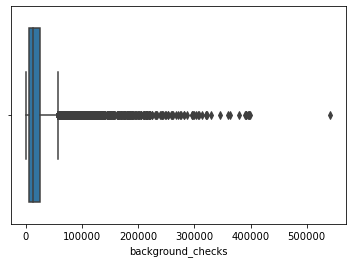

In [ ]:
# to detect for outlier in the dataset

import seaborn as sns
sns.boxplot(df_gun['background_checks']);

we carried out a summary statistics on the data as shown below

In [ ]:
df_gun.describe() #summary statistics on the data set

,background_checks,year
count,12485.000000,12485.000000
mean,21595.725911,2007.792952
std,32591.418387,5.468296
min,0.000000,1998.000000
25%,4638.000000,2003.000000
50%,12399.000000,2008.000000
75%,25453.000000,2013.000000
max,541978.000000,2017.000000


C:\Users\Cloud\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


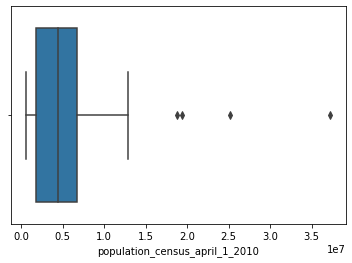

In [ ]:
sns.boxplot(new_df_census['population_census_april_1_2010']); #to detect for outliers

In [ ]:
new_df_census.describe() #summary statistics

Fact,population_census_april_1_2010
count,5.000000e+01
mean,6.162876e+06
std,6.848235e+06
min,5.636260e+05
25%,1.833004e+06
50%,4.436370e+06
75%,6.680312e+06
max,3.725396e+07


## Research Question 1: Overall trend of gun checks over time

Examining the trends by months shows that more background checks are carried out in the month of December

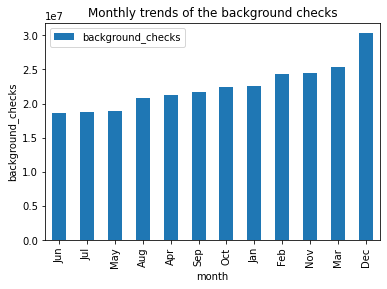

In [ ]:
# check the total background checks by months of the year
monthly_trend = df_gun.groupby('month', as_index = False)['background_checks'].sum()
monthly_trend = monthly_trend.sort_values('background_checks')

monthly_trend.plot(x = 'month', y = 'background_checks', kind='bar')
plt.ylabel('background_checks')
plt.xlabel('month')
plt.title('Monthly trends of the background checks');

The overall trend shows an upward curve movement, which indicates that more background checks are being carried out with time

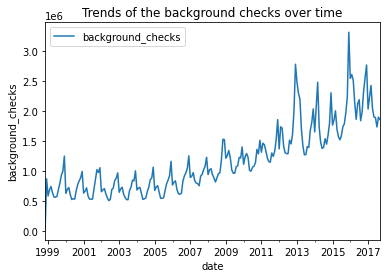

In [ ]:
# trend of background checks over time
df_gun.groupby('date', as_index = False)['background_checks'].sum().plot(x='date', y='background_checks', kind='line');

plt.ylabel('background_checks')
plt.xlabel('date')
plt.title('Trends of the background checks over time');

The yearly trend curve show that the background checks are increasing proportionally with time

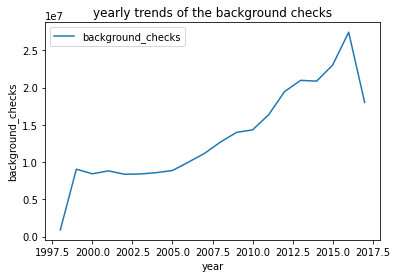

In [ ]:
# show trends by year

df_gun.groupby('year', as_index = False)['background_checks'].sum().plot(x='year', y='background_checks', kind = 'line');

plt.ylabel('background_checks')
plt.xlabel('year')
plt.title('yearly trends of the background checks');

## Research Question 2: State with the highest gun checks per capita

We create a new dataframe to merge with the census data in order to carry out further analysis

In [ ]:
# create a new data frame

df_back_checks = df_gun.groupby('state', as_index = False)['background_checks'].sum()
inspect_data(df_back_checks)

,state,background_checks
0,Alabama,6706079
1,Alaska,1137643
2,Arizona,4425714
3,Arkansas,3752633
4,California,19014063


We merge the two dataframes using the pandas merge function

In [ ]:
# combine the dataframes using the panda's merge function 

cmb_df = new_df_census.merge(df_back_checks, left_on = 'lstate', right_on = 'state', how = 'inner')
inspect_data(cmb_df)

,lstate,population_census_april_1_2010,state,background_checks
0,Alabama,4779736,Alabama,6706079
1,Alaska,710231,Alaska,1137643
2,Arizona,6392017,Arizona,4425714
3,Arkansas,2915918,Arkansas,3752633
4,California,37253956,California,19014063


We create a new column that will show the background checks of each state per population of that state

In [ ]:
# create a column for gun checks per capita

cmb_df['gun_per_capita'] = cmb_df['background_checks']/cmb_df['population_census_april_1_2010']
inspect_data(cmb_df)

,lstate,population_census_april_1_2010,state,background_checks,gun_per_capita
0,Alabama,4779736,Alabama,6706079,1.403023
1,Alaska,710231,Alaska,1137643,1.601793
2,Arizona,6392017,Arizona,4425714,0.692381
3,Arkansas,2915918,Arkansas,3752633,1.286947
4,California,37253956,California,19014063,0.510390


In [ ]:
max_gun = cmb_df['gun_per_capita'].max() #get the maximum number in the gun_per_capital column

In [ ]:
filt = cmb_df['gun_per_capita'] == max_gun #assign the value to a variable, filt.

In [ ]:
cmb_df.loc[filt] #use the .loc to find the item

,lstate,population_census_april_1_2010,state,background_checks,gun_per_capita
16,Kentucky,4339367,Kentucky,29762434,6.858704


### This implies that Kentucky has the highest gun per capita

## Research Question 3: State that has had the highest growth in gun registration

let us examine and see the total checks for each of the states yearly

In [ ]:
# let us examine and see the total checks for each of the states yearly
new_df = df_gun.groupby(['year','state'], as_index = False)['background_checks'].sum()

Create a new dataframe called to show the initial value of the background checks for each states as of 1998

In [ ]:
# copy the first 55 data, which represents each state's total checks in 1998, to a new dataframe
df_1998 = new_df.head(55).copy()
df_1998


,year,state,background_checks
0,1998,Alabama,36568
1,1998,Alaska,3985
2,1998,Arizona,17453
3,1998,Arkansas,21752
4,1998,California,67445
5,1998,Colorado,23798
6,1998,Connecticut,6870
7,1998,Delaware,2135
8,1998,District of Columbia,0
9,1998,Florida,32341


In [ ]:
# rename the column names as shown below

df_1998.rename(columns = {'background_checks': 'b_checks_1998', 'year':'year_1998','state':'lstate'}, inplace = True)
inspect_data(df_1998)

,year_1998,lstate,b_checks_1998
0,1998,Alabama,36568
1,1998,Alaska,3985
2,1998,Arizona,17453
3,1998,Arkansas,21752
4,1998,California,67445


create a new dataframe to show the cummulative background checks by each state up until 2017

In [ ]:
# let us now see the total checks by each states from 1998 to 2017 
# we will assign this to a new data frame

df_b_total = df_gun.groupby('state', as_index = False)['background_checks'].sum()
inspect_data(df_b_total)

,state,background_checks
0,Alabama,6706079
1,Alaska,1137643
2,Arizona,4425714
3,Arkansas,3752633
4,California,19014063


In [ ]:
# we can also choose to rename some of the columns as we wish

df_b_total.rename(columns = {'background_checks': 'b_checks_total'}, inplace = True)
inspect_data(df_b_total)

,state,b_checks_total
0,Alabama,6706079
1,Alaska,1137643
2,Arizona,4425714
3,Arkansas,3752633
4,California,19014063


We merge the two newly created dataframes

In [ ]:
# we will merge the two newly created data frames above

cmb_df_year = df_1998.merge(df_b_total, left_on = 'lstate', right_on = 'state', how = 'inner')
inspect_data(cmb_df_year)

,year_1998,lstate,b_checks_1998,state,b_checks_total
0,1998,Alabama,36568,Alabama,6706079
1,1998,Alaska,3985,Alaska,1137643
2,1998,Arizona,17453,Arizona,4425714
3,1998,Arkansas,21752,Arkansas,3752633
4,1998,California,67445,California,19014063


In [ ]:
# we drop some of the columns as we may wish

cmb_df_year.drop(columns = ['year_1998','state'], inplace = True)
inspect_data(cmb_df_year)

,lstate,b_checks_1998,b_checks_total
0,Alabama,36568,6706079
1,Alaska,3985,1137643
2,Arizona,17453,4425714
3,Arkansas,21752,3752633
4,California,67445,19014063


we noticed that some values in the b_checks_1998 are zero. In order
to ensure we don't run into problems in the future as a result of 
dividing by zero, we can look for the index of this columns and 
delete the entry

In [ ]:
zero_value = cmb_df_year[cmb_df_year['b_checks_1998'] == 0]

zero_value.index

Int64Index([8, 21, 49], dtype='int64')

delete the entries where there is a zero value in the b_checks_1998 column

In [ ]:
# delete the entries where there is a zero value in the b_checks_1998 column

cmb_df_year.drop(index = zero_value.index, inplace = True)
inspect_data(cmb_df_year)

,lstate,b_checks_1998,b_checks_total
0,Alabama,36568,6706079
1,Alaska,3985,1137643
2,Arizona,17453,4425714
3,Arkansas,21752,3752633
4,California,67445,19014063


create a new column to show the growth from 1998

In [ ]:
# create a new column to show the growth from 1998

cmb_df_year['growth_from_1998'] = cmb_df_year['b_checks_total'] - cmb_df_year['b_checks_1998']
inspect_data(cmb_df_year)

,lstate,b_checks_1998,b_checks_total,growth_from_1998
0,Alabama,36568,6706079,6669511
1,Alaska,3985,1137643,1133658
2,Arizona,17453,4425714,4408261
3,Arkansas,21752,3752633,3730881
4,California,67445,19014063,18946618


look for the state that has the highest nominal growth

In [ ]:
# look for the state that has the highest nominal growth

max_growth = cmb_df_year['growth_from_1998'].max()

filt_1 = cmb_df_year['growth_from_1998'] == max_growth

cmb_df_year.loc[filt_1]

,lstate,b_checks_1998,b_checks_total,growth_from_1998
18,Kentucky,31869,29762434,29730565


The above table shows that Kentucky's number of background checks increased the most from 1998 to 2017 by 29,730,565

### create another column to show the growth rate in percentage

In [ ]:
# create another column to show the growth rate in percentage

cmb_df_year['percent_growth'] = (cmb_df_year['growth_from_1998']/cmb_df_year['b_checks_1998']) * 100
inspect_data(cmb_df_year)

,lstate,b_checks_1998,b_checks_total,growth_from_1998,percent_growth
0,Alabama,36568,6706079,6669511,18238.654014
1,Alaska,3985,1137643,1133658,28448.130489
2,Arizona,17453,4425714,4408261,25257.898356
3,Arkansas,21752,3752633,3730881,17151.898676
4,California,67445,19014063,18946618,28091.953444


In [ ]:
# look for the state that has the highest growth rate

max_growth_rate = cmb_df_year['percent_growth'].max()

filt_2 = cmb_df_year['percent_growth'] == max_growth_rate

cmb_df_year.loc[filt_2]



,lstate,b_checks_1998,b_checks_total,growth_from_1998,percent_growth
10,Georgia,3819,7209942,7206123,188691.358995


The above table shows that Georgia has the highest growth percentage considering that the background checks increased by 188,891 percent approximately

# Conclusion

From the analysis performed on the FBI gun data and Census data, we discovered that the total background checks increases yearly.

we also discovered that Kentucky has the highest gun checks per capita of 6.86 and that the city also has the highest nominal gun growth of 29,730,565. However, Georgia has the highest gun growth rate at 188,691 percent since 1998.

**LIMITATION:** clear limitation of this project is that the total gun checks can not be qualified as gun purchase because each state has its own legislation with respect to gun purchase.
